# ASSİGNMENT 2

#### Muhammet Batuhan Doğan 
#### 2210765004

# Part 1 Theory Questions


Question 1

One of the workers in an emergency call center is charged with calculating priorities
of the cases that is reported to the department. He/She determines the priority of
the case according to the probabilities, higher probability the case has, higher priority
it has. Three phone calls arrive at the same time interval and all of the callers are
calling from different neighborhoods but about the same topic: There is a smoke in their
neighborhood and they are worried if the smoke caused due to a dangerous fire but they
are too scared to observe the case from a nearby spot. The statistics are as follows,
sort the cases according to their priority. 

• The statistics show you that probability of the dangerous fires at the first neighborhood is rare (1%), however, barbecue smoke is quite common (20%), moreover
smoke occurs 80% of the dangerous fires.

• The statistics show you that probability of the dangerous fires at the second
neighborhood is common (35%) and smoke due to factory near that neighborhood
is quite rare (10%), moreover, smoke occurs 1% of the dangerous fires.

• The statistics show you that probability of the dangerous fires at the third neighborhood is seldom (10%), however smoke due to usage of coal instead of natural
gas is very common (80%), moreover, smoke occurs 30% of the dangerous fires.

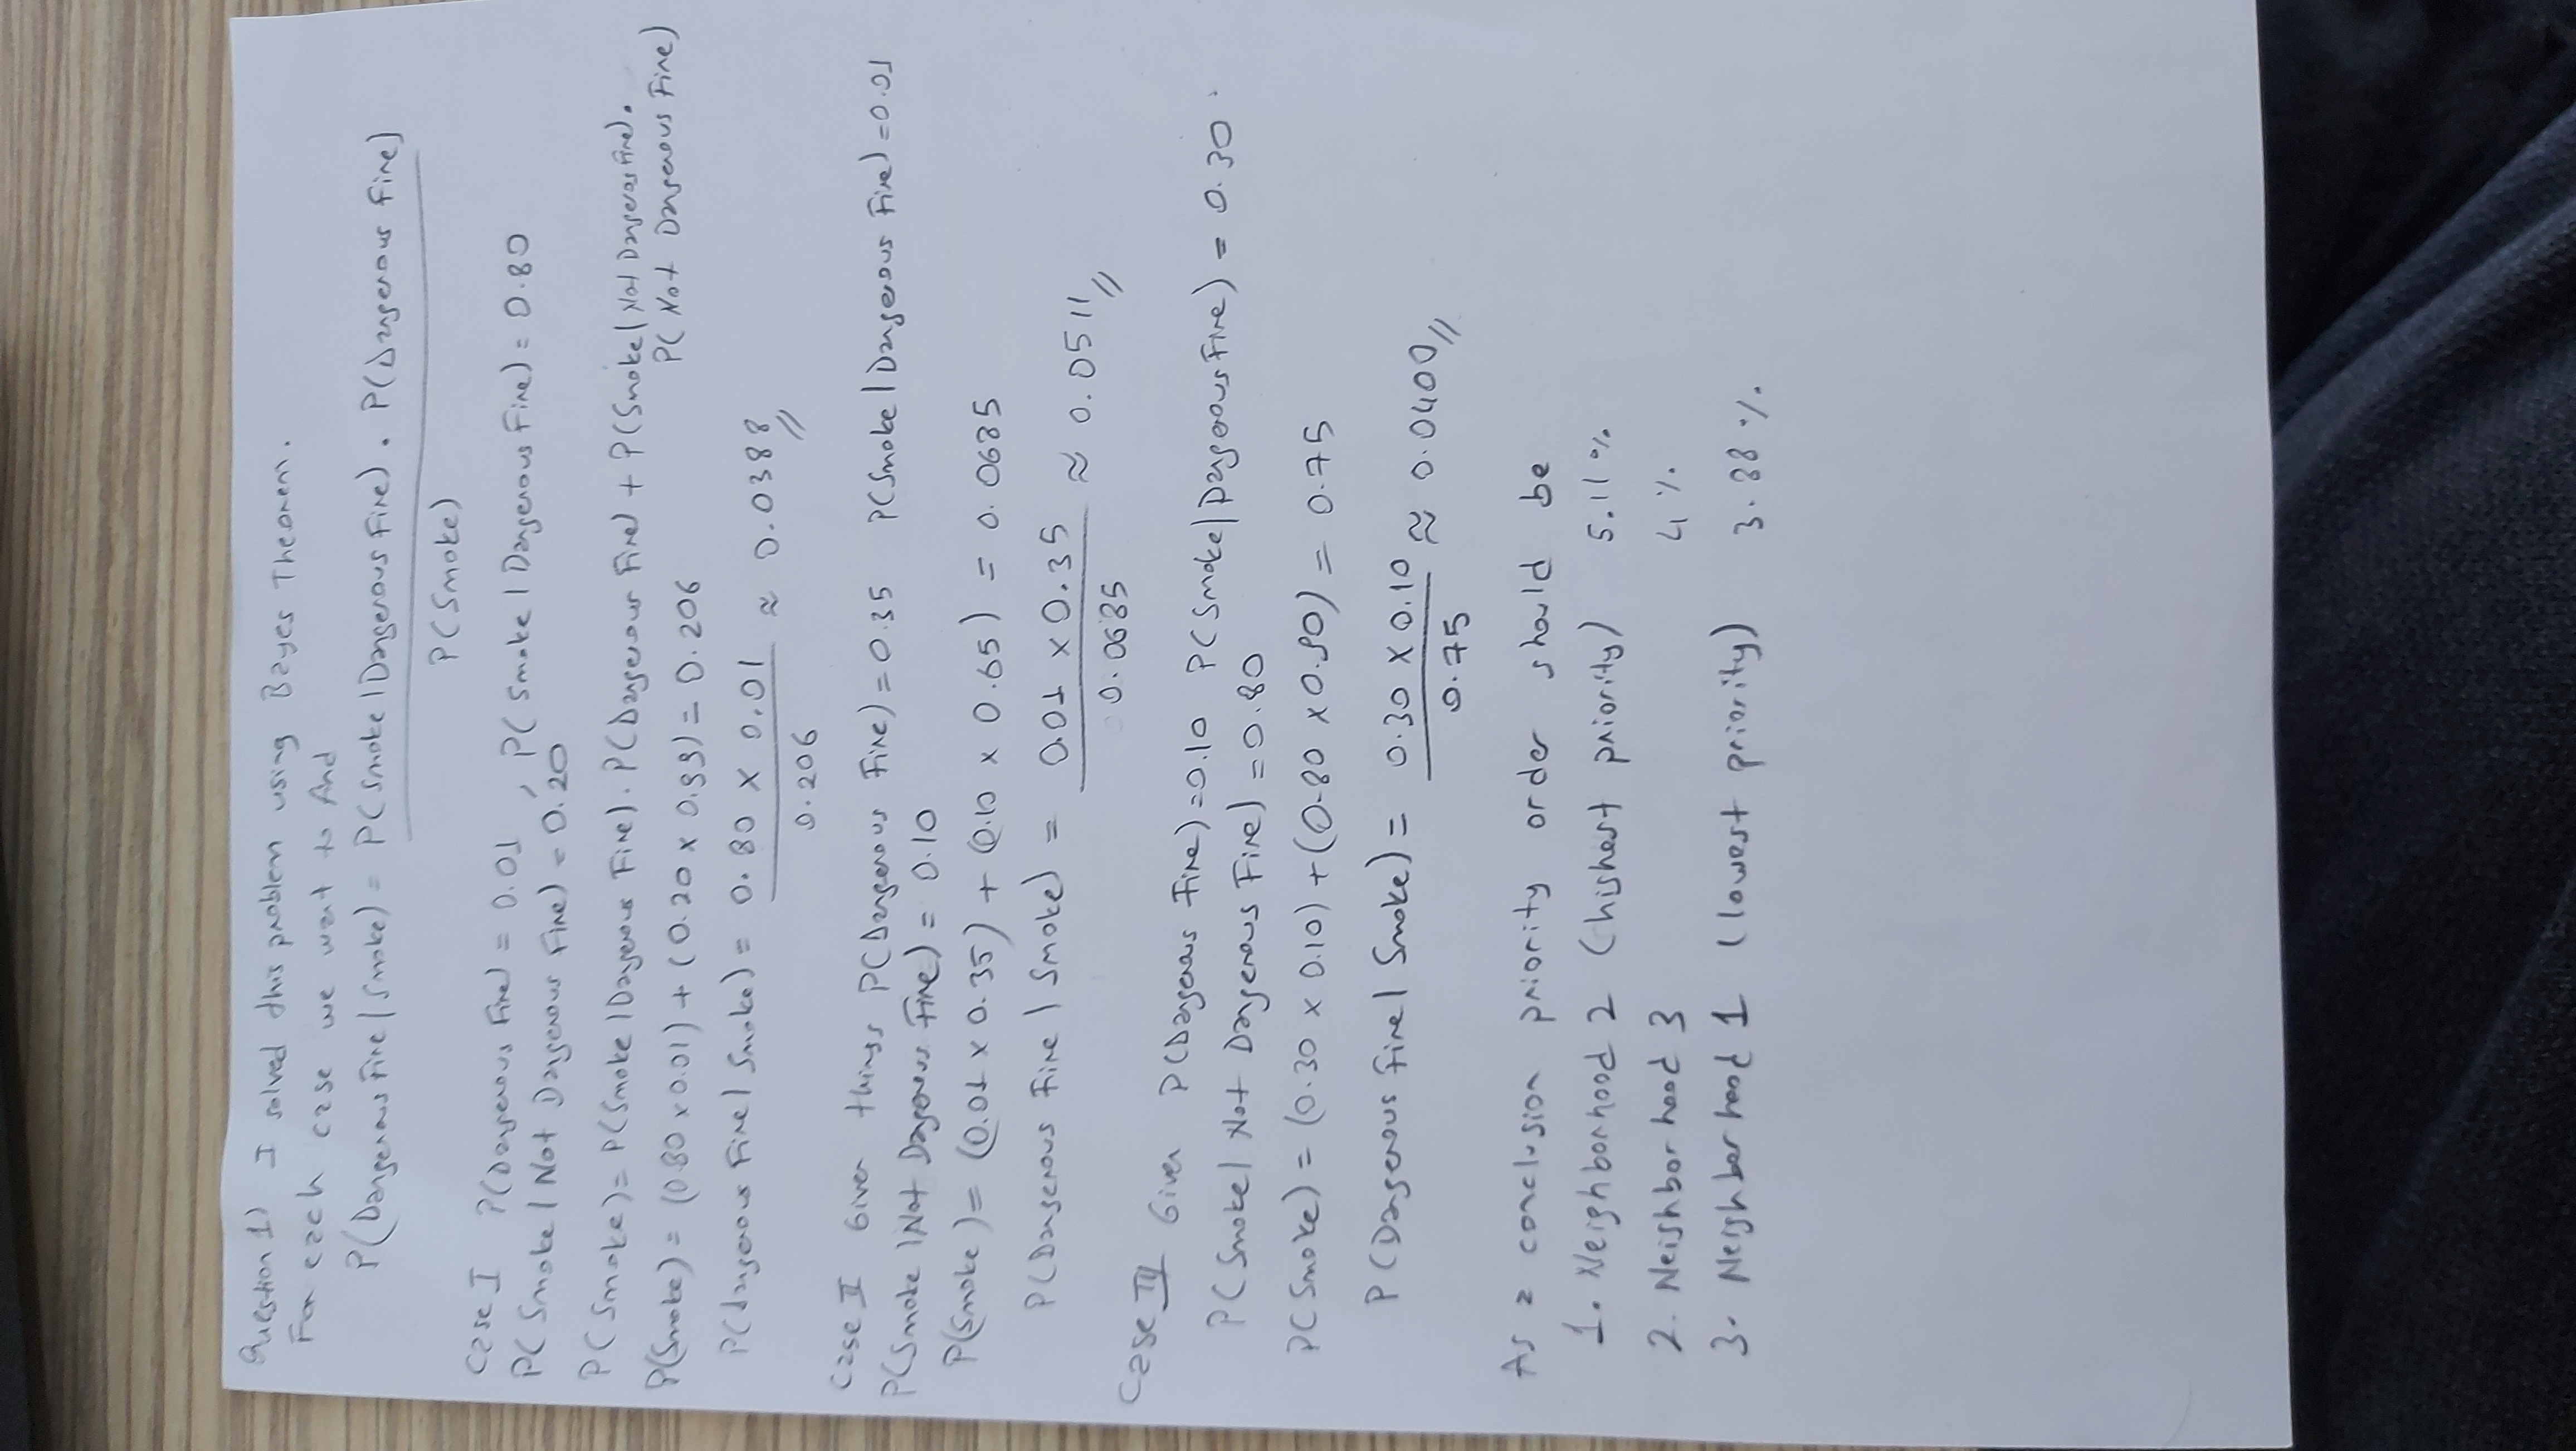

Question 2

There are two boxes, the first one contains 5 red and 3 blue balls while the second
one contains 7 red and 4 blue balls. One of the boxes is selected with a bias, where
probability of selecting the first box is 40%, and a ball is drawn from the selected box.
Calculate the following with explanations:

• The probability of blue ball is drawn.

• The probability of second box has been selected if it is known that the blue ball
is drawn.


Question 3 

Fill the blanks with T (True) or F (False) for the statements below

1- Text classification is the primary application for Naïve Bayes classifier methods.
(_)

2- When an attribute value in the testing record has no example in the training set,
the total posterior probability in a Naïve Bayes algorithm will be zero. (_)


Statement 1 answer is true.

Explanation: Naïve Bayes classifier method are high likely to used for text classification, example tasks like spam detection, sentiment analysis, categorization. Because Naïve Bayes performs effectively with high-dimensional data and makes certain simplifying assumptions to get well results with  text data, where the presence or absence of specific words can independently contribute to the classification such as Bag of Words approach


Statement 2 answer is true.

Explanation: In Naïve Bayes when calculating the posterior probability  if a feature value or values in the test data is not present in the training data for any class, its conditional probability is zero. Since Naïve Bayes multiplies probabilities across all features, a zero probability for any feature would make the total posterior probability zero for that class.To solve this issue there are some additive approaches such as Laplace smoothing.

# Part 2 Movie Review Classification System

## do not touch below this one

Data Extraction: From dataset file (aclImdb_v1.tar.gz), and i extracted only the necessary parts (pos and neg folders from train and test), containing the labeled reviews.

Text Parsing and Structuring: i read the text files, labeled each review as "positive" or "negative," and organized them into two CSV files (train_data.csv and test_data.csv), making them easier to use.

In [ ]:
import tarfile
import os

# Paths for the dataset and extraction location
file_path = 'aclImdb_v1.tar.gz'  # Update this to your file's location if different
extraction_path = 'aclImdb_extracted'  # Directory where you want to extract the dataset

# Step 1: Extract only the necessary folders
with tarfile.open(file_path, 'r:gz') as tar:
    # Extract only the supervised 'pos' and 'neg' folders within 'train' and 'test'
    for member in tar.getmembers():
        if 'train/pos/' in member.name or 'train/neg/' in member.name or \
           'test/pos/' in member.name or 'test/neg/' in member.name:
            tar.extract(member, path=extraction_path)

# Step 2: Load the reviews into a dictionary or DataFrame for easy access
import pandas as pd

def load_reviews(folder_path, label):
    reviews = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            reviews.append(file.read())
    return pd.DataFrame({'review': reviews, 'sentiment': label})

# Paths to the extracted 'pos' and 'neg' folders in train and test
train_pos_path = os.path.join(extraction_path, 'aclImdb', 'train', 'pos')
train_neg_path = os.path.join(extraction_path, 'aclImdb', 'train', 'neg')
test_pos_path = os.path.join(extraction_path, 'aclImdb', 'test', 'pos')
test_neg_path = os.path.join(extraction_path, 'aclImdb', 'test', 'neg')

# Load all reviews into DataFrames
train_pos_reviews = load_reviews(train_pos_path, 'positive')
train_neg_reviews = load_reviews(train_neg_path, 'negative')
test_pos_reviews = load_reviews(test_pos_path, 'positive')
test_neg_reviews = load_reviews(test_neg_path, 'negative')

# Combine into full train and test DataFrames
train_data = pd.concat([train_pos_reviews, train_neg_reviews]).sample(frac=1).reset_index(drop=True)
test_data = pd.concat([test_pos_reviews, test_neg_reviews]).sample(frac=1).reset_index(drop=True)

# Optionally: save to CSV or inspect a sample
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

# Display sample data
print("Train sample:\n", train_data.head())
print("\nTest sample:\n", test_data.head())


this shows how i extract data from source to my local

## Do not touch above this one

## Data understanding part

In [8]:
import pandas as pd
# Load the pre-generated CSV files
train_df = pd.read_csv('train_data.csv')
test_df = pd.read_csv('test_data.csv')



In [9]:
print(train_df.shape) 
print()
print(test_df.shape) 
 

(25000, 2)

(25000, 2)


In [28]:
print(train_df.dtypes)
print()
print(test_df.dtypes)

review       object
sentiment    object
dtype: object

review       object
sentiment    object
dtype: object


In [37]:
train_df.describe()



review sentiment
count                                               25000     25000
unique                                              24904         2
top     How has this piece of crap stayed on TV this l...  positive
freq                                                    3     12500

In [38]:
test_df.describe()

review sentiment
count                                               25000     25000
unique                                              24801         2
top     Loved today's show!!! It was a variety and not...  negative
freq                                                    5     12500

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


Since my data is in text format, I didn’t attempt to visualize it through plots or other numerical representations. I observed that the uniqueness of the reviews is high, with approximately 99.6% unique values in the training set and 99.2% in the test set. Given this, I decided against using any data balancing techniques.

Our model employs a Bag-of-Words (BoW) approach, where text length is not highly significant as BoW focuses on the presence and frequency of words rather than sequence or structure. Therefore, I believe that this basic understanding of the data will be sufficient for our analysis.

## Data preprocessing and modeling part

In [10]:
import re
import math
from collections import defaultdict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
# Data Cleaning Function
def clean_text(data):
    """
    Cleans the input text data by removing HTML tags, special characters, and digits,
    and converting the text to lowercase.

    Parameters:
        data (str): Raw input text data.

    Returns:
        str: Cleaned text data with only alphabetic characters and whitespace.
    """
    data = re.sub(r'<.*?>', '', data)  # Remove HTML tags
    data = re.sub(r'[^a-zA-Z\s]', '', data)  # Remove special characters and digits
    data = data.lower()  # Convert to lowercase
    return data


In [12]:
# Tokenization Function
def tokenize(data, n=1):
    """
    Tokenizes the input text into n-grams.

    Parameters:
        data (str): Cleaned text data.
        n (int): The number of words to include in each n-gram. Defaults to 1 (unigram).

    Returns:
        list of str: List of n-grams generated from the input text.
    """
    words = data.split()
    if n == 1:
        return words
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram_words = words[i:i + n]
        ngram = ' '.join(ngram_words)
        ngrams.append(ngram)
    return ngrams

In [13]:
#Bag of Words Model
class BagOfWordsTFIDF:
    """
    A Bag-of-Words model enhanced with TF-IDF weighting and rare word handling.

    Attributes:
        rare_word_threshold (int): Minimum frequency for a word to be included in the vocabulary.
        vocab (set): Vocabulary containing frequently used words and "unknown" for rare words.
        idf (dict): Inverse Document Frequency (IDF) values for words.
        word_counts (dict): Counts of each word across all documents.
    """
    def __init__(self, rare_word_threshold=1):
        """
        Initializes the BagOfWordsTFIDF instance with a rare word threshold.

        Parameters:
            rare_word_threshold (int): Threshold for treating words as "unknown" if below this count.
        """
        self.vocab = {}
        self.idf = defaultdict(float)
        self.rare_word_threshold = rare_word_threshold
        self.word_counts = defaultdict(int)  # To store word counts across documents

    def fit(self, documents, n=1):
        """
        Fits the model by computing term frequencies and IDF values.

        Parameters:
            documents (list of str): List of text documents to build the vocabulary and compute IDF values.
            n (int): N-gram level for tokenization. Defaults to unigram (1).
        """
        doc_count_per_token = defaultdict(int)
        total_docs = len(documents)
        
        for doc in documents:
            tokens = tokenize(clean_text(doc), n=n)
            for token in set(tokens):
                self.word_counts[token] += 1
                doc_count_per_token[token] += 1

        self.vocab = {word for word, count in self.word_counts.items() if count > self.rare_word_threshold}
        self.vocab.add("unknown")  # Add "unknown" token

        for token in self.vocab:
            doc_count = doc_count_per_token.get(token, 0)
            self.idf[token] = math.log(total_docs / (1 + doc_count))

    def transform(self, document, n=1):
        """
        Transforms a document into its TF-IDF vector representation.

        Parameters:
            document (str): Text document to be transformed.
            n (int): N-gram level for tokenization. Defaults to unigram (1).

        Returns:
            dict: TF-IDF values for each word in the document.
        """
        words = tokenize(clean_text(document), n=n)
        total_words = len(words)
        tf_idf_vector = {}
        
        for word in words:
            if word not in self.vocab:
                word = "unknown"
                
            tf = words.count(word) / total_words
            idf = self.idf.get(word, 0)
            tf_idf_vector[word] = tf * idf
            
        return tf_idf_vector

In [14]:
# Naive Bayes Classifier with optional interpolation smoothing
class NaiveBayesClassifier:
    """
    Naive Bayes classifier for sentiment classification with Laplace and backoff smoothing options.

    Attributes:
        alpha (float): Smoothing parameter.
        smoothing (str): Type of smoothing ('laplace' or 'backoff').
        n (int): N-gram level.
        interpolation_weights (dict): Weights for backoff smoothing.
        vocab (set): Vocabulary of words used in training.
        class_word_tfidf (dict): TF-IDF values per class.
        class_totals (dict): Total TF-IDF per class.
        class_priors (dict): Log priors for each class.
    """
    def __init__(self, alpha=1, smoothing='laplace', n=1, interpolation_weights=None):
        self.alpha = alpha
        self.smoothing = smoothing
        self.n = n
        self.interpolation_weights = interpolation_weights if interpolation_weights else {1: 0.2, 2: 0.3, 3: 0.5}
        self.vocab = set()
        self.class_word_tfidf = {'positive': defaultdict(float), 'negative': defaultdict(float)}
        self.class_totals = {'positive': 0, 'negative': 0}
        self.class_priors = {'positive': 0, 'negative': 0}
        self.bow_tfidf = BagOfWordsTFIDF()

    def fit(self, documents, labels):
        """
        Trains the Naive Bayes classifier.

        Parameters:
            documents (list of str): Training documents.
            labels (list of str): Corresponding sentiment labels ('positive' or 'negative').
        """
        positive_docs = [doc for doc, label in zip(documents, labels) if label == 'positive']
        negative_docs = [doc for doc, label in zip(documents, labels) if label == 'negative']
        
        total_docs = len(documents)
        self.class_priors['positive'] = math.log(len(positive_docs) / total_docs)
        self.class_priors['negative'] = math.log(len(negative_docs) / total_docs)
        
        for i in range(1, self.n + 1):
            self.bow_tfidf.fit(documents, n=i)
            for doc, label in zip(documents, labels):
                tf_idf_vector = self.bow_tfidf.transform(doc, n=i)
                for word, tfidf_value in tf_idf_vector.items():
                    self.class_word_tfidf[label][(word, i)] += tfidf_value
                    self.class_totals[label] += tfidf_value
                    self.vocab.add(word)

    def calculate_probability(self, word, label):
        """
        Calculates log probability for a word given a label using either backoff or Laplace smoothing.

        Parameters:
            word (str): Word for which probability is calculated.
            label (str): Class label ('positive' or 'negative').

        Returns:
            float: Log probability of the word given the label.
        """
        if self.smoothing == 'backoff':
            prob = sum(weight * ((self.class_word_tfidf[label].get((word, n), 0) + self.alpha) / 
                    (self.class_totals[label] + self.alpha * len(self.vocab))) for n, weight in self.interpolation_weights.items())
            return math.log(prob)
        else:
            word_tfidf = self.class_word_tfidf[label].get((word, 1), 0) + self.alpha
            total_tfidf = self.class_totals[label] + self.alpha * len(self.vocab)
            return math.log(word_tfidf / total_tfidf)

    def predict(self, document):
        """
        Predicts the sentiment label for a given document.

        Parameters:
            document (str): Text document to classify.

        Returns:
            str: Predicted sentiment label ('positive' or 'negative').
        """
        scores = {label: self.class_priors[label] for label in self.class_priors}
        
        for i in range(1, self.n + 1):
            tf_idf_vector = self.bow_tfidf.transform(document, n=i)
            for word, tfidf_value in tf_idf_vector.items():
                scores['positive'] += tfidf_value * self.calculate_probability(word, 'positive')
                scores['negative'] += tfidf_value * self.calculate_probability(word, 'negative')
        
        return 'positive' if scores['positive'] > scores['negative'] else 'negative'

In [15]:
# Function to Run and Evaluate Each Configuration
def evaluate_classifier(alpha, smoothing, n, interpolation_weights=None):
    """
    Initializes and evaluates the Naive Bayes classifier, displaying performance metrics and a confusion matrix.

    Parameters:
        alpha (float): Smoothing parameter.
        smoothing (str): Type of smoothing ('laplace' or 'backoff').
        n (int): N-gram level.
        interpolation_weights (dict, optional): Interpolation weights for backoff smoothing.

    Outputs:
        None. Displays the accuracy, precision, recall, F1 score, and confusion matrix plot.
    """
    nb_classifier = NaiveBayesClassifier(alpha=alpha, smoothing=smoothing, n=n, interpolation_weights=interpolation_weights)
    nb_classifier.fit(train_X, train_y)

    predictions = [nb_classifier.predict(doc) for doc in test_X]
    accuracy = accuracy_score(test_y, predictions)
    precision = precision_score(test_y, predictions, average='weighted', zero_division=1)
    recall = recall_score(test_y, predictions, average='weighted')
    f1 = f1_score(test_y, predictions, average='weighted')

    print(f"Configuration: Smoothing={smoothing}, N-gram Level={n}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    conf_matrix = confusion_matrix(test_y, predictions)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=set(test_y), yticklabels=set(test_y))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - Smoothing={smoothing}, N-gram Level={n}")
    plt.show()

### Summary of Implementation

This implementation performs movie review sentiment analysis through a Naive Bayes classifier.

1. **Data Cleaning**: Preprocesses text data to remove HTML tags, special characters, digits, and convert to lowercase for consistency.
2. **Tokenization**: Converts cleaned text into n-grams, allowing for unigram, bigram, or higher-order representations of text.
3. **TF-IDF Weighted Bag-of-Words Model**: Builds a vocabulary with term frequency-inverse document frequency (TF-IDF) values for each word,
   while also handling rare words by treating them as "unknown" for improved generalization.
4. **Naive Bayes Classifier with Smoothing**: Implements a Naive Bayes model that supports both Laplace and backoff smoothing techniques,
   allowing for flexibility in handling unseen words or n-grams in test data.
5. **Model Evaluation**: Calculates key performance metrics (Accuracy, Precision, Recall, F1-Score) and generates a confusion matrix
   to assess the classifier's performance under various configurations of n-grams and smoothing methods.

This structure ensures the implementation can adapt to different levels of n-grams (unigram, bigram, trigram) and smoothing methods, making it versatile for various sentiment analysis tasks.



### Evaluation and Result part 

Evaluating Naive Bayes Classifier with different n-gram and smoothing configurations...
Configuration: Smoothing=laplace, N-gram Level=1
Accuracy: 0.8432
Precision: 0.8454733717693425
Recall: 0.8432
F1 Score: 0.8429416211249185


Configuration: Smoothing=laplace, N-gram Level=2
Accuracy: 0.83596
Precision: 0.8396049665214764
Recall: 0.83596
F1 Score: 0.835518657081427


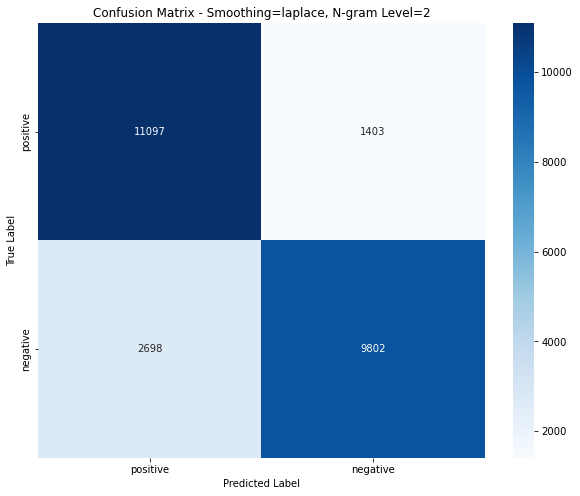

Configuration: Smoothing=laplace, N-gram Level=3
Accuracy: 0.83756
Precision: 0.8398811741584097
Recall: 0.83756
F1 Score: 0.8372821849751728


Configuration: Smoothing=backoff, N-gram Level=3
Accuracy: 0.85484
Precision: 0.8571858112431202
Recall: 0.85484
F1 Score: 0.8546012741358059


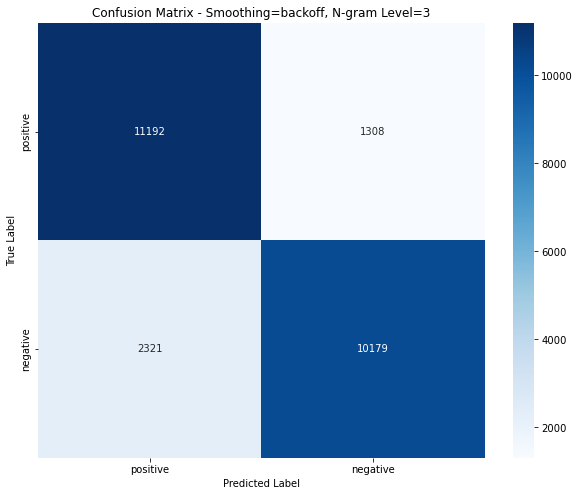

In [16]:
# Example Usage
train_X = train_df['review'].tolist()  # List of training documents
train_y = train_df['sentiment'].tolist()  # List of training labels
test_X = test_df['review'].tolist()  # List of test documents
test_y = test_df['sentiment'].tolist()  # List of test labels

# Evaluations for each configuration
print("Evaluating Naive Bayes Classifier with different n-gram and smoothing configurations...")

# 1. Unigram with Laplace Smoothing
evaluate_classifier(alpha=1, smoothing='laplace', n=1)

# 2. Bigram with Laplace Smoothing
evaluate_classifier(alpha=1, smoothing='laplace', n=2)

# 3. Trigram with Laplace Smoothing
evaluate_classifier(alpha=1, smoothing='laplace', n=3)

# 4. Trigram with Backoff Smoothing (example interpolation weights for unigrams, bigrams, and trigrams)
evaluate_classifier(alpha=1, smoothing='backoff', n=3, interpolation_weights={1: 0.2, 2: 0.3, 3: 0.5})


In [17]:

# Evaluations with alpha = 5
print("\nResults for alpha = 5:")
evaluate_classifier(alpha=5, smoothing='laplace', n=1)  # Unigram with Laplace Smoothing
evaluate_classifier(alpha=5, smoothing='laplace', n=2)  # Bigram with Laplace Smoothing
evaluate_classifier(alpha=5, smoothing='laplace', n=3)  # Trigram with Laplace Smoothing
evaluate_classifier(alpha=5, smoothing='backoff', n=3, interpolation_weights={1: 0.2, 2: 0.3, 3: 0.5})  # Trigram with Backoff



Results for alpha = 5:
Configuration: Smoothing=laplace, N-gram Level=1
Accuracy: 0.84668
Precision: 0.8497177321537431
Recall: 0.84668
F1 Score: 0.8463463318403712


Configuration: Smoothing=laplace, N-gram Level=2
Accuracy: 0.81972
Precision: 0.8263753948313375
Recall: 0.81972
F1 Score: 0.8187962304308873


Configuration: Smoothing=laplace, N-gram Level=3
Accuracy: 0.82044
Precision: 0.82628478689471
Recall: 0.82044
F1 Score: 0.8196322616101701


Configuration: Smoothing=backoff, N-gram Level=3
Accuracy: 0.82352
Precision: 0.8292995195340865
Recall: 0.82352
F1 Score: 0.8227422394591833


## Inference part for my setup

I used **alpha = 1** and **alpha = 5** to observe the effect of different smoothing values on my model. To further refine the model, I applied both **Laplace smoothing** and a **backoff model**. My expectation was that the backoff model, by interpolating across different n-gram levels, would decrease variance and potentially improve results by leveraging context more effectively.

### For alpha = 1:
- Across all configurations, the metrics (**accuracy**, **precision**, **recall**, and **F1 score**) were balanced, indicating that **alpha = 1** provides an appropriate level of smoothing that prevents over-reliance on specific terms without losing valuable information.
- Among the configurations, **backoff smoothing on trigrams** yielded the best balance of metrics. This approach allowed the model to effectively capture sentiment patterns by combining unigram, bigram, and trigram information, thus enhancing generalization without overfitting.

### For alpha = 5:
- Compared to **alpha = 1**, there was a slight decrease in metrics across configurations, suggesting possible **underfitting**. This could be due to the stronger smoothing effect of **alpha = 5**, which reduces the influence of specific terms and n-grams, possibly leading the model to be overly generalized and unable to capture some nuances of the data.
- The **best configuration for alpha = 5** was **unigrams with Laplace smoothing**. Higher-order n-grams with a large alpha appeared to smooth out important distinctions in the data, whereas unigrams performed best, likely due to their simplicity and broader generalization capability.



### Conclusion
- **Alpha = 1 with backoff smoothing on trigrams** was the most effective configuration, as it provided a balanced trade-off between variance reduction and sufficient detail capture for sentiment analysis.
- For **alpha = 5**, **unigrams with Laplace smoothing** was the most balanced, though it did not perform as well as the **alpha = 1** configuration, likely due to increased smoothing effects leading to minor underfitting.


## My Ideas About the Assignment

This assignment is my first experience with NLP, so initially, it was challenging to understand how to build a language-processing model. However, as I explored further, I encountered a variety of methods and incorporated some into my work. I focused on understanding Bag-of-Words, n-grams, and smoothing techniques, which helped me grasp how Naive Bayes can effectively perform sentiment analysis on text.

For this assignment, I used a class structure to create a more readable and flexible framework for testing various configurations. Designing this structure was somewhat difficult, but it allowed me to organize the code for easier modification and testing across different scenarios.

##  ACKNOWLEDGEMENTS
Some part of the development of this report have been assisted by AI tools, with a special mention to ChatGPT4o and Deepl Translator for its assistance in conceptualizing the assignment and refining the wording.